## K8 Concepts Part2
____

+ PODs using YAML
+ Replication Controllers
+ Replica Set
+ Demo Replicasets
+ Deployments
+ Demo Deployments
+ Deployment Updates and Rollback

## Pods using YAML
___


Here we going to use a pod, uding yaml base configuration.

Here we going to use yaml files specifically for k8s

K8s use yaml files as inputs for the creation of objects, such as pods, replicas, deployments, services etc.

All of these files follow similar structure: pod-definition.yml

File must contain the four top level fields:

```
apiVersion:
kind:
metadata:
spec:
```

These are the top level or root level properties.

apiversion is set yo v1. 

kind refers to the type of object we going to create, in our case, Pod.

metadata is data bout the object, like name , labels. This section is in a form of a dictionary. so everythin under metadata is to th right: nameas and labels are children of metadata.

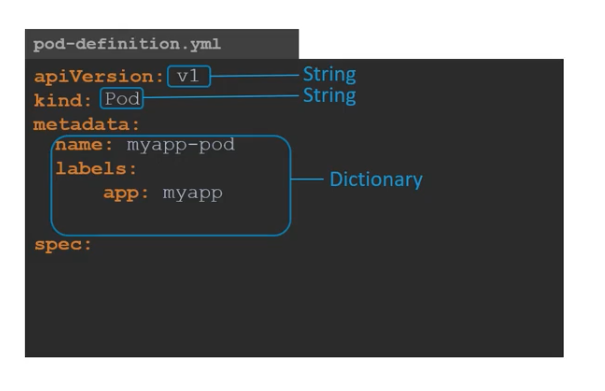

And labels is a dictionary within the metadata dictionary, and it can have any key/value pair combinations.

The labels app and type me specified as expected by k8s. You cannot add any other property here.


The spec section is additional information we provide to k8s about the object we going to create. It will be different for different objects and we need to refer to the documentation.

Spec is also a dictionary..


Under it we have containers which is a list/array. The reason why this is a list, is that the pods ca have multiple containers, within them.

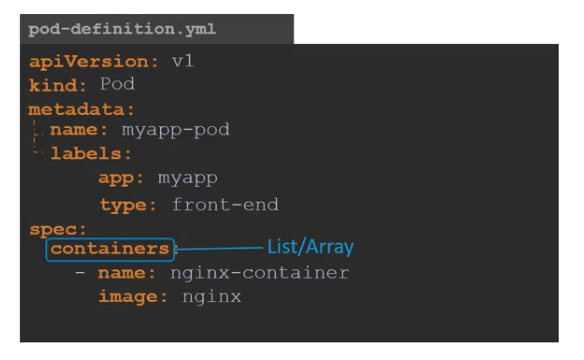



However here we wil only add a single item in the list, since we only have a single container, per pod

The ```-``` dash before the name indicates it is the first item, in the list


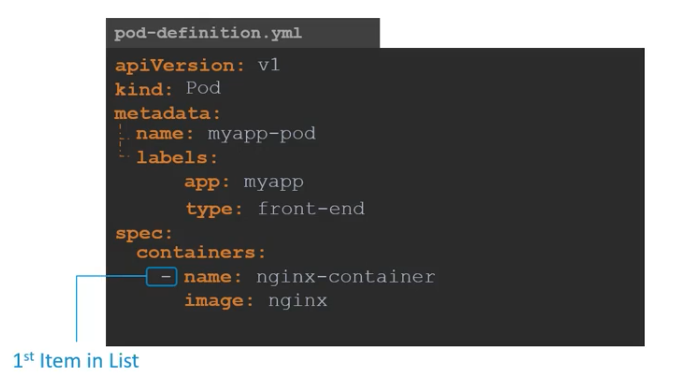

image is the name of the image in the docker repository.

So we have the following file: pod-definition.yml

```
apiVersion:v1
kind:Pod
metadata:
    name: myapp-pod
    labels:
        app:myapp
        type:front-end
spec:
    containers:
        - name: nginx-container
          image:nginx  

```

We then use use the following command to create the pod:

```
kubectl create -f pod-definition.yml 
```

See the created pods:

```
kubectl get pods
```

Get details about the pod

```
kubectl describe pod myapp-pod
```













## Replication Controllers

____

Controllers are the brains behind k8s.


The monitor k8s objects and respond accordingly. Here we will look at one controller,  named the replication controller.

What is a replica and why do we need a replication controller?

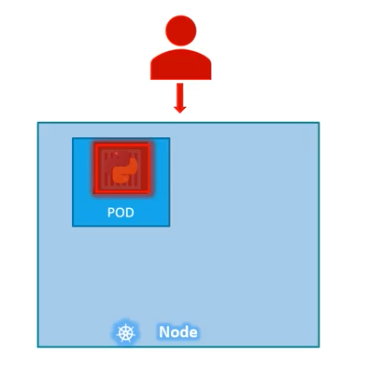

If we have single POD, and the it crashes, user wont be able to access our app. How to prevent this, we need more than one instance or pod running at the same time. So if one pod fails, the other pod with our application can service our user.

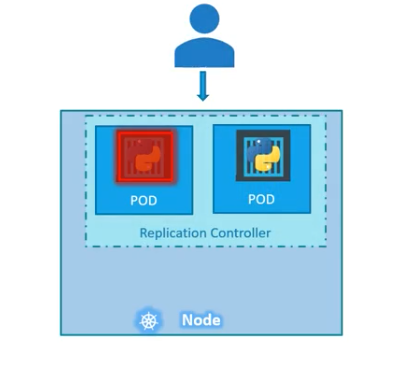

Replication controller helps us running multiple instances of single pod in k8s cluster, and in so provide high availability.


Even if you have a single pod, can you still use a replication controller. Yes, if the old pod fails, it will bring up new pod. So replication controller ensure that the specified number of pods, runs at one time.

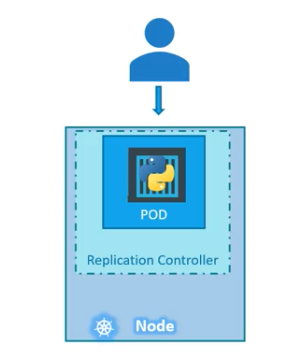

The other reason why we use the replication controller is to share the load among the pods, that is for load balancing and scaling.

First we have single pod, serving a set of user:

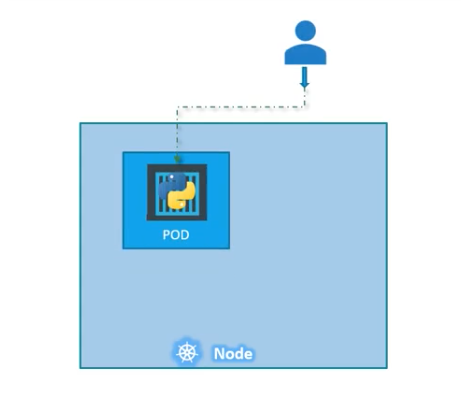


Then if the users increases, we deploy additional ods to balance the load:

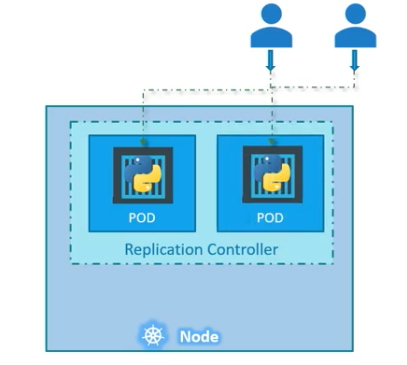


If the demand further increases, and we run out of pods on the first node, we can deploy additoional pods across the other nodes:

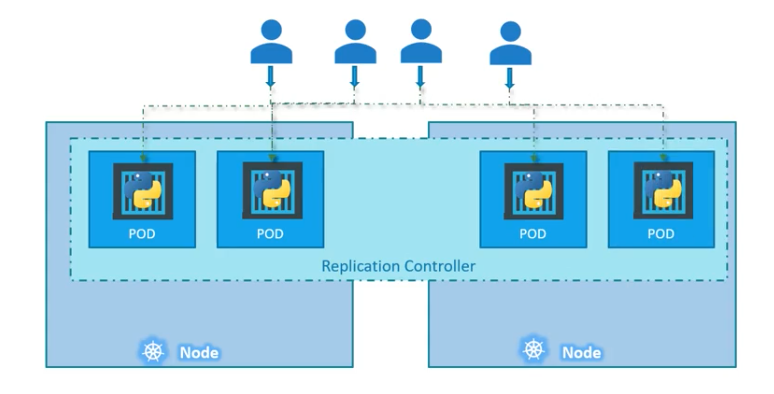

Now the load is balanced across multiple nodes, and we can scale our application when the demand increases.



We have the following terms

1. Replication Controller
2. Replica Set


Botj have the same purpose, but they not the same.

Replication Controller is the older technology, which is replace by the replica set, which is the new recommended way.


We will discuss both, the replica set is the one we will be using.

Lets start off first with the older definition.

How do we create a replica controller? We use a yaml file again. rc-definition.yml

we have the four section, and then add further information from there.


```
apiVersion: v1
kind: ReplicationController
metadata:
    name: myapp-rc
    labels: 
        app: myapp
        type: front-end
spec:
```

replication controller is supported in K8s v1.
 
kind is ReplicationController

then specify name etc, this is all the same we specified for the POD

the next section, spec is the crucial part. Remember the spec section defines what is inside the object, that is the replication controller creates multiple instances of a POD.

That is what we need to define here. 

We specify a template section under spec, to define the POD difinition here:


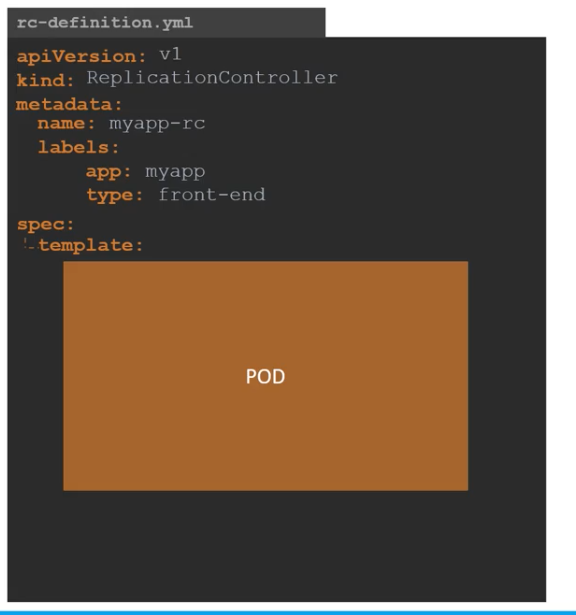

How do we define the pod template...this looks very familiat, cant we use the pod yml information we defined befor..correct we can. The same definition

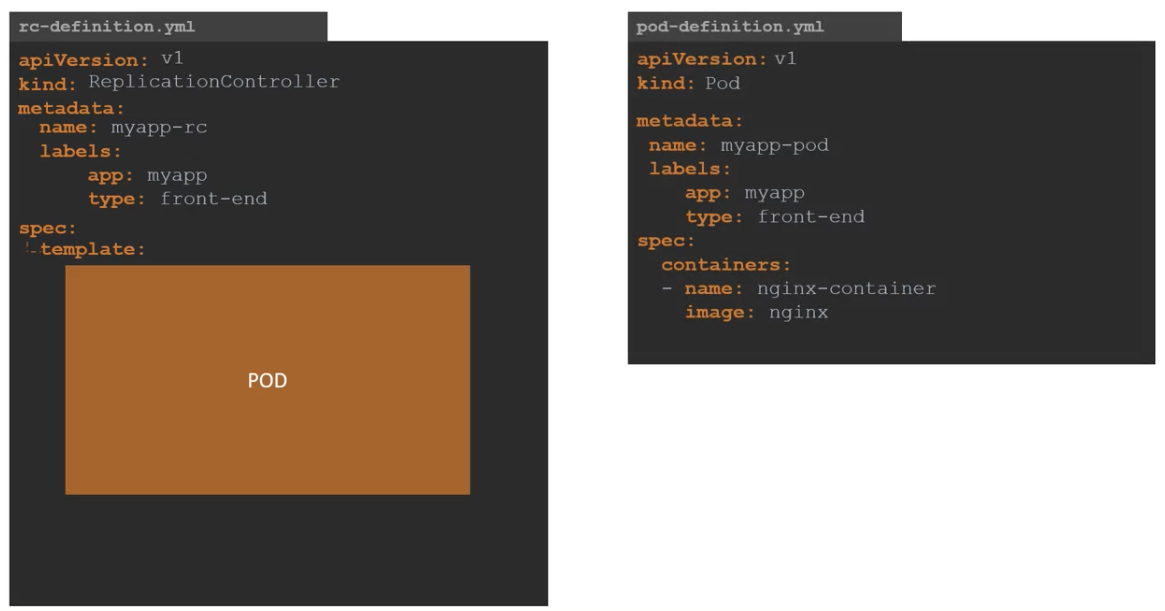

Move all the contents of the pod definition file into the template section of the rc file (except for the first few lines)

So what we move must be under the template section.

Bit we missing vital information, we have not mentioned how many replicas we need in the eplication controller

We add ```replicas``` property, and add the number. template and replicas are siblings.


Again we use kubectl command to create the replication controller.


```
kibectl create -f rc-definition.yml
```

So what happens

1. First the pods are created, with the correct number 
2. and replication controller are created


How to see the replicationcontroller created

```
kubectl get replicationcontroller.
```

See the pods that was created by the replicationcontroller:

```
kubectl get pods
``
















## 

## Replica Set

____

Let now look at replicaset...replicaset-definition.yml


```
apiVersion: apps/v1
kind: ReplicationController
metadata:
    name: myapp-rc
    labels: 
        app: myapp
        type: front-end
spec:
```

Version is different, This is one change.

All the other sections are the same. 

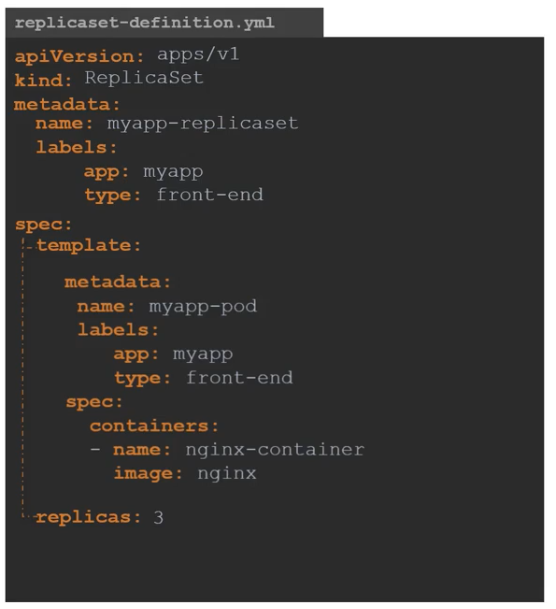


But there is on major difference.

Replicaset requires a selector definition:

```
selector:
```

The selector difinition helps the replicaset, to define what pods fall under it. But why do we need to specify the pods it needs to use, when the defintion of the pod is already inside the file?

The reason is that replicaset can also manage pods, that was not created as part of the (this file) replicaset creation (was not defined in the file). Meaning, pods that was created before, that was not created in the replica set, then the selector can also define those pods in the selector section. 

So the selector is an optional field (assume it to be the same as the label provided) for the replication controller, but is is required for the replicaset.

The selector will contain matchedlabels, and will match the labels found under the pod definion (under template). There are selection also have other parameters that can be specified for labels that are not part of the replication controller.

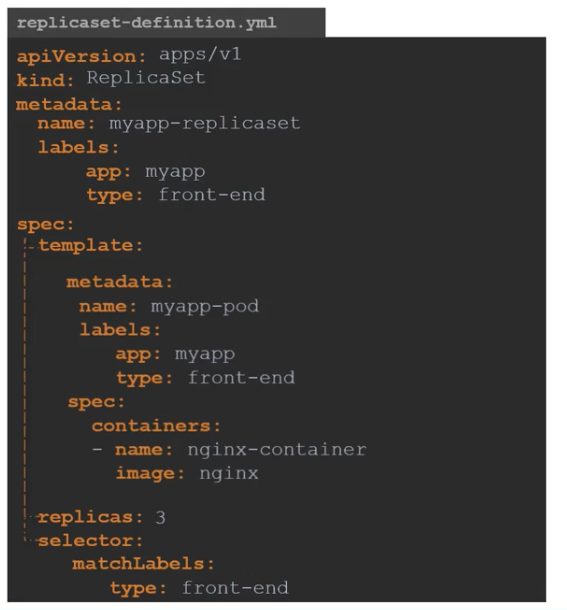



And we run the command:

```
kibectl create -f replicaset-definition.yml
```




## Labels and Selectors

____

What is the deal with label and selectors? But why do we label our pods and object in k8s?

Lets look at the following scenario:

We have 3 pods, and want to create replicationcontroller to enure we always have 3 active pods at one time.

This is one of the use cases of a replica set:

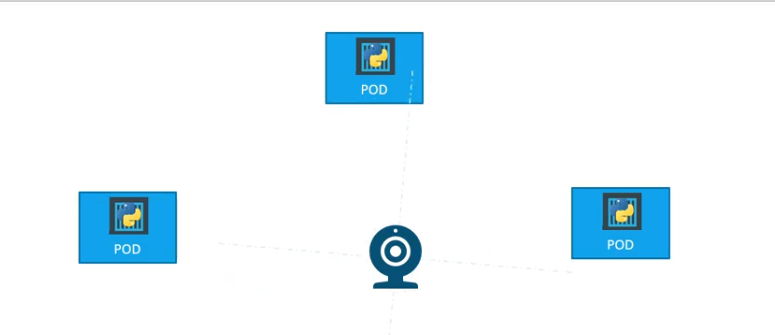

So we can use it to monitor existing pods if they are already created.

However if it was not created before the replicaset will create it for you.

So if anyone fails, the rc will deploy new ones. So it is a process that monitors the pods.

So how does the replicaset know which pods to monitor? There could be hundreds of other pods running in the cluster

This is were labelling our pods during creation come in.

So the selector is s filter to see which pods the replicaset must monitor. So the label in the pod definition, will have to match up with the selector/matchlabels parameter in the replicast definition file.

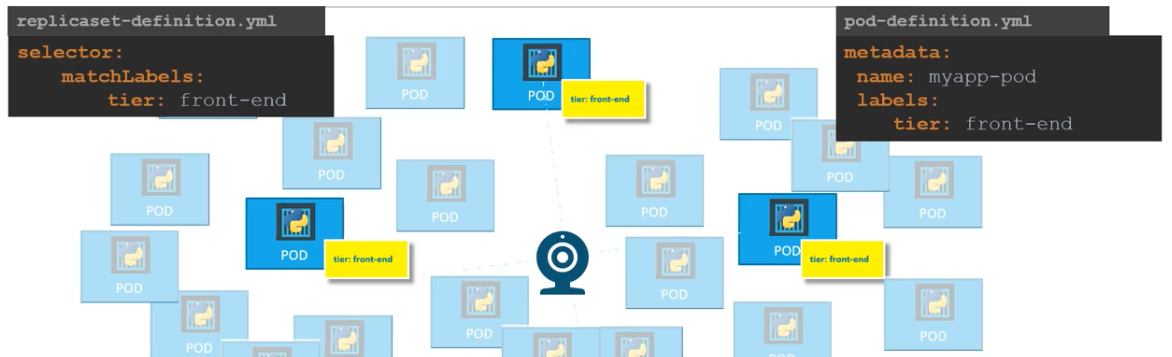

So it knows which pods to monitor.



Lets say we have the following scenarion: We have alreadythe following sets:


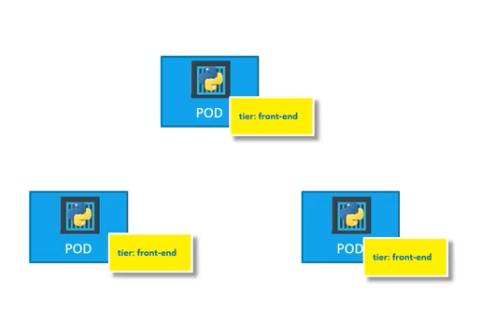

And we have the following replicaset file.

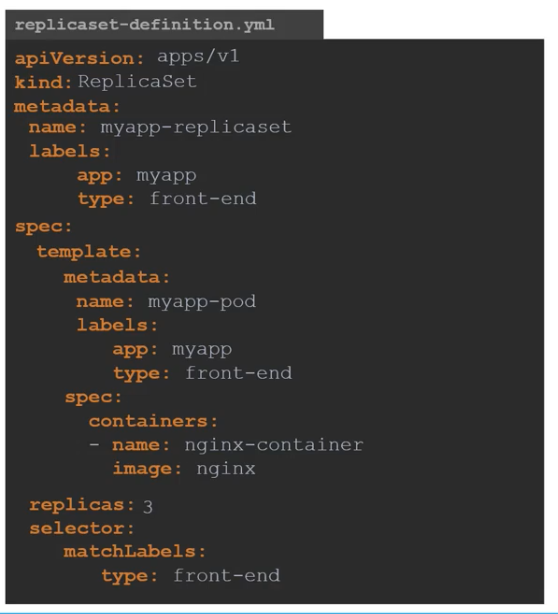

Will the replicaset generate another 3 instances? No. Then we can then also say, do we need to provide a template section (where the pods are defined), since we creating pods, since they are already there> Yes we do need this template (section), since if one of the pods goes down, then we will need this information. 


Scaling...how do we go about doing so.?

Lets say we started with 3 replicates and we want to increase to another 3, so we want 6 in total.


```
replicas:3

```

How do we update our replica set to update to 6 replicas? There are multiple ways to do it..

1. Update the replicas number in the definition file to 6, Them run the kubectl replace command:

```
kubectl replace -f replicaset-deinition.yml
```
2. Run te kubctl scale command, with the replicas parameter with the new number, and specify the same file as input

```
kubectl scale --replicas=6 -f replicaset-deinition.yml

```

Or you can provide the new replicas in type/name format:


```
kubectl scale --replicas=6  replicaset myapp-replicaset

```

where replicaset = type
where myapp-replicaset =name


To delete a replica-set, we need to issue the following command:


```
kubectl delete replicaset myapp-replicaset.
```

This will also delete all underlying pods

## Demo Replica-sets

_____

Inside replicaset folder


replicaset-definition.yml

Refer to the k9s deocumentation for further information:

1. kubernetes.io/docs
2. Concepts
3. Workloads
4. Controllers
5. Replicasets


```
--- 
apiVersion: apps/v1
kind: ReplicaSet
metadata: 
  labels: 
    app: myapp
    type: front-end
  name: myapp-replicaset
spec: 
  replicas: 3
  selector: 
    matchLabels: 
      app: myapp
  template: 
    metadata: 
      labels: 
        app: myapp
      name: myapp-pod
    spec: 
      containers: 
        - 
          image: nginx
          name: nginx-container


```
Test on Yamllint.com


Create the contents

```
cat >replicaset-definition.yml
```

Verify the contents

```
cat replicaset-definition.yml
```

Create the replicaset using the kubectl command, on the master node

```
sudo kubectl create -f replicaset-definition.yml
```

Output generated

```
replicaset.apps/myapp-replicaset created
```

Get the replicaset

```
sudo kubectl get replicaset
```
Output generated

```
NAME               DESIRED   CURRENT   READY   AGE
myapp-replicaset   3         3         3       97s

```
```
Desired = No of Pods
Current = No of pods
Ready = no of pods
```


Get the number of pods:

```
kubectl get pods
```

```
NAME                     READY   STATUS    RESTARTS   AGE
myapp-replicaset-27vl2   1/1     Running   0          3m29s
myapp-replicaset-n6rmv   1/1     Running   0          3m29s
myapp-replicaset-v587b   1/1     Running   0          3m29s
```

They all have the name of the replicaset prefixed to it.


Get more information about the replicaset

```
kubectl describe replicaset
```
Output generated

```
Name:         myapp-replicaset
Namespace:    default
Selector:     app=front-end
Labels:       app=myapp
              type=front-end
Annotations:  <none>
Replicas:     3 current / 3 desired
Pods Status:  3 Running / 0 Waiting / 0 Succeeded / 0 Failed
Pod Template:
  Labels:  app=front-end
  Containers:
   nginx-container:
    Image:        nginx
    Port:         <none>
    Host Port:    <none>
    Environment:  <none>
    Mounts:       <none>
  Volumes:        <none>
Events:
  Type    Reason            Age    From                   Message
  ----    ------            ----   ----                   -------
  Normal  SuccessfulCreate  5m38s  replicaset-controller  Created pod: myapp-replicaset-v587b
  Normal  SuccessfulCreate  5m38s  replicaset-controller  Created pod: myapp-replicaset-27vl2
  Normal  SuccessfulCreate  5m38s  replicaset-controller  Created pod: myapp-replicaset-n6rmv

```


To test the replicaset, lets delete one pod, and see if it will regenerate....Remember the replicaset is suppose to monitor the pods, and as they fail, to bring them up.

```
kubectl delete pod myapp-replicaset-v587b

```

We get the following output

```
NAME                     READY   STATUS              RESTARTS   AGE
myapp-replicaset-27vl2   1/1     Running             0          11m
myapp-replicaset-9j76m   0/1     ContainerCreating   0          16s
myapp-replicaset-n6rmv   1/1     Running             0          11m
myapp-replicaset-v587b   0/1     Terminating         0          11m
NAME                     READY   STATUS              RESTARTS   AGE
myapp-replicaset-27vl2   1/1     Running             0          11m
myapp-replicaset-9j76m   0/1     ContainerCreating   0          32s
myapp-replicaset-n6rmv   1/1     Running             0          11m
NAME                     READY   STATUS         RESTARTS   AGE
myapp-replicaset-27vl2   1/1     Running        0          11m
myapp-replicaset-9j76m   0/1     ErrImagePull   0          44s
myapp-replicaset-n6rmv   1/1     Running        0          11m
NAME                     READY   STATUS    RESTARTS   AGE
myapp-replicaset-27vl2   1/1     Running   0          11m
myapp-replicaset-9j76m   1/1     Running   0          58s
myapp-replicaset-n6rmv   1/1     Running   0          11m
```

Old one is terminated, and the new one is created, and running.

Lets try something different..

Lest create an additional pod, from the pod definition file that we created earlier:

lets visit the yml file again: pod-definition.yml


```
apiVersion: v1
kind: Pod
metadata:
    name: myapp-pod
    labels:
        app: myapp
        type: front-end
spec:
    containers:
        - name: nginx-container
          image: nginx

```


We will now create another pod, not from the replicaset, but by running the pod-definition.yml file.


```
kubectl create -f pod-definition.yml

```

What do you think wil happen? Since the replicaset monitor the number of pod, and to keep it at the number as specified in replicaset definition file.

Yuo can create the pod, but as soon as you create it, replicaset will remove it.

See output

```
NAME                     READY   STATUS        RESTARTS   AGE
myapp-pod                0/1     Terminating   0          7s
myapp-replicaset-72nr5   1/1     Running       0          2m28s
myapp-replicaset-gdh4g   1/1     Running       0          2m28s
myapp-replicaset-s7d26   1/1     Running       0          2m28s

```

It will maintain the replicas=3 setting all the time


How does it doe this? It is based on the labels of the replicaset. It will not allow you to create new pods with the same labels. A new pod with a different label will not be deleted by the replicaset.

If we see the events of what happened during the lifetime of replica set we can use the describe commmand:
 

```
kubectl describe replicaset

```

Lets say we want to increase the pods by 3.

1. We can update the replicas field to 6 in yml file.


Now lets run the kubecrl replace command


```
sudo kubectl replace -f replicaset-definition.yml 

```

And now we have 6 pods:

```
NAME                     READY   STATUS    RESTARTS   AGE
myapp-replicaset-72nr5   1/1     Running   0          14m
myapp-replicaset-g6dv6   1/1     Running   0          51s
myapp-replicaset-gdh4g   1/1     Running   0          14m
myapp-replicaset-l6qnz   1/1     Running   0          51s
myapp-replicaset-nf9zn   1/1     Running   0          51s
myapp-replicaset-s7d26   1/1     Running   0          14m

```

Lets use the kubectl scale command to scale the replicas down by 3


```
sudo kubectl scale --replicas=3 -f replicaset-definition.yml

```

Remember the file is not automatically updated to 3. It will still have the old value.


```
NAME                     READY   STATUS        RESTARTS   AGE
myapp-replicaset-72nr5   1/1     Running       0          18m
myapp-replicaset-g6dv6   1/1     Terminating   0          4m29s
myapp-replicaset-gdh4g   1/1     Running       0          18m
myapp-replicaset-l6qnz   1/1     Terminating   0          4m29s
myapp-replicaset-nf9zn   1/1     Terminating   0          4m29s
myapp-replicaset-s7d26   1/1     Running       0          18m
NAME                     READY   STATUS    RESTARTS   AGE
myapp-replicaset-72nr5   1/1     Running   0          18m
myapp-replicaset-gdh4g   1/1     Running   0          18m
myapp-replicaset-s7d26   1/1     Running   0          18m
```

And we can delete the replicaset

```
kubectl delete replicaset myapp-replicaset
```

```
NAME                         READY   STATUS        RESTARTS   AGE
pod/myapp-replicaset-72nr5   0/1     Terminating   0          21m
pod/myapp-replicaset-gdh4g   0/1     Terminating   0          21m
pod/myapp-replicaset-s7d26   0/1     Terminating   0          21m

```

## Deployments

____

Let think about how to deploy your application in a production environment, but lets forget about pods and replicasets.


Lets say we have a web server that we want to deploy in a prod env, so we need many instances of it.

That is if there are newer versions of the app, we want to update it not all at once, but incrementally until all as done, i.e rolling updates.


but what if the updates (new version) resulted in an error, how do we go about rolling back to an earlier version?

Also lets we want to make MULTIPLE changes to our environment:

1. Upgrading the underlying web server version
2. Scaling the environment
3. Modifying the resource allocations 
4. Ect

We essentially do not want to apply all these changes immediately...we need to pause... and then, we need to ensure hat all the changed are rolled out togther...lets see


All of the above can be achieved with the k8s deployments.

So far we dealt with pods, which deploys single instances, and which has out containers. And to to deploy multiple pods we use replication sets.

Now we have deploymentnts which is higher in the hierarchy:

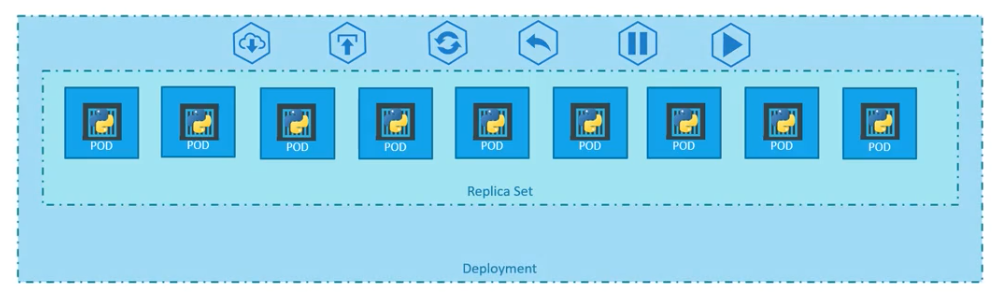

Deployments allow us

1. To upgrade the underlying instances seamlessly, using rolling updates
2. Undo changes, pause, and resume changes


How do we create a deployment, a per the previous ways, we also create a defintion yml file. The contents are similar to the replicaset definition file, except for the kind which will now be deployment, and change the name to myapp-deployment

```

apiVersion: apps/v1
kind: Delpoyment
metadata: 
  labels: 
    app: myapp
    type: front-end
  name: myapp-deployment
spec: 
  replicas: 3
  selector: 
    matchLabels: 
      app: myapp
  template: 
    metadata: 
      labels: 
        app: myapp
      name: myapp-pod
    spec: 
      containers: 
        - 
          image: nginx
          name: nginx-container



```

We run the kubectl create command with the definition file.

```
kubectl create -f delpoyment-defintion.yml
kubectl get deployments
```

So the deployment will automatically create a replicaset.

So if we type the following command we get the name of the deployment (instead of replicaset name in output) (see in the demo)

```
kubectl get replicateset
```

And obviously, the replicasets create pods, so when we run the command we get the pod listing:


```
kubectl get pods
```

So far there has not been much of difference between replicasets and deployments, except we now have a new object called deployments which is a level above replicasets.

To see all the objects created



```
kubectl get all
```


















## Demo Deployments

____

We will create the deployment definition file: deployment-definition.yml


```
apiVersion: apps/v1
kind: Deployment
metadata: 
  labels: 
    app: myapp
    type: front-end
  name: myapp-deployment
spec: 
  replicas: 3
  selector: 
    matchLabels: 
      app: myapp
  template: 
    metadata: 
      labels: 
        app: myapp
      name: myapp-pod
    spec: 
      containers: 
        - 
          image: nginx
          name: nginx-container

```

So in production you will not be creating a pod or replicaset definition file. In most use cases you will be able to generate a deployment defintion file.

What you may want to do, is first create pod def, the replicaset def, copy content of pod def to rep def file and so forth if you want to be complete and meticulous. And if you feel more comfortable with it.

But again, not necessary can deirectly start with the deployment def file.








## Deployment Updates and Rollback

____

How do we deal with updates and rollback during a deployment.

How does a rollout and versioning work?


When you first create a deployment, it triggers a rollout, and a new rollout creates a new 
deployment revision. Lets call it revision 1.

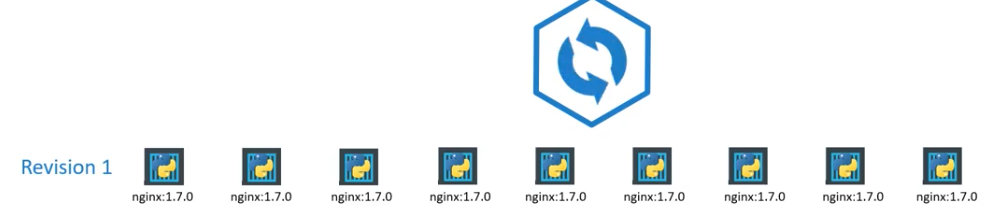

When the application is upgraded, that is when we go to the next version, a new rollout is trigger, and a new deployment revision is recreated, that is revision 2.


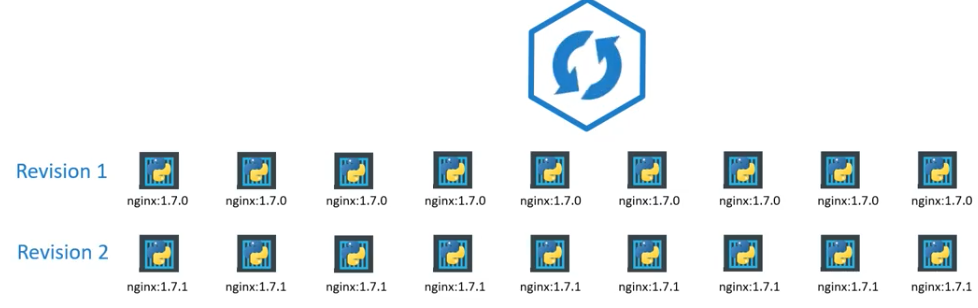

This helps us keep track of the changes to the deployment, and enables us to rollback to a a version of deployment.

We can see the status of the rollout, by usig the kubectl rollout status, followed by the name of the deployment.

```
sudo kubectl rollout status deployment/myapp-deployment
```
The above deployment roll-out....

And see the history of the deployments


```
sudo kubectl rollout history deployment/myapp-deployment
```

There are two types of deployment stategies

1. Recreate stategy.

We have 5 instances of the web app deployed.

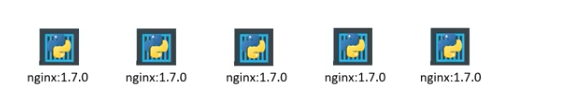

One way to upgrade these instances to a newer version, is to destroy all of these, and create newer versions. Only problem with this is that there is an application down time between the transition.

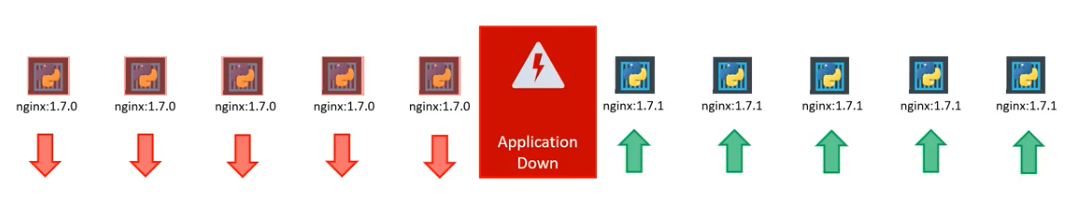

This is called the recreate strategy, and thankfully it is not the default strategy

2. Rolling update

This strageti is were we do not destroy them all at once, infact we take down one older version, and bring up a new version on by one. This way there is always a running version of the app and the upgrade is seamless..

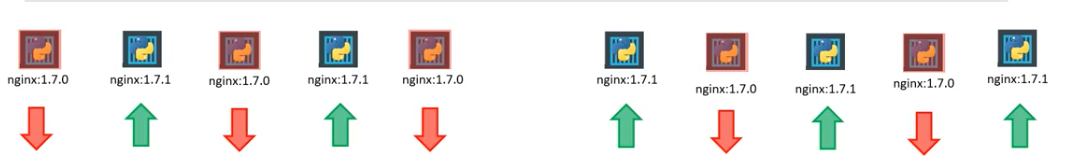

This is the default strategy if you do not specify a roll out strategy.


So how exactly do you update your deployment??? Update can refer to updating the version of the app or updating the labels or replicas, etc


But since we already have a deployment-definition file it is easy to modify this file, and once we make the changes we run the kubectl apply command.

e.g. updating the nginx version

```
kubectl apply -f deployment-definition.yml

```

What happens when this command is issued

1. A new rollout is triggered 
2. A new revision of the deployment is triggered.

But we can to this another way..

we can use the kubectl set image command, to update the image of your application

```
kubectl set image deployment-definition.yml nginx=nginx:1.9.1

```

But doing it this way will result in the deployment-definition file still have the old version, as the file is not updated when issuing this command.
 


The difference between the Recreate and the Rolling Update strategy is when you view the deployments in detail. Run the kubectl describe deployment command


```
kubectl describe deployment myapp-deployment

```

We notice the following:

When the Recreate stratgey was used, we can see from the events that the old replicaset was scaled down to zero, then the new replicaset scaled up to 5.

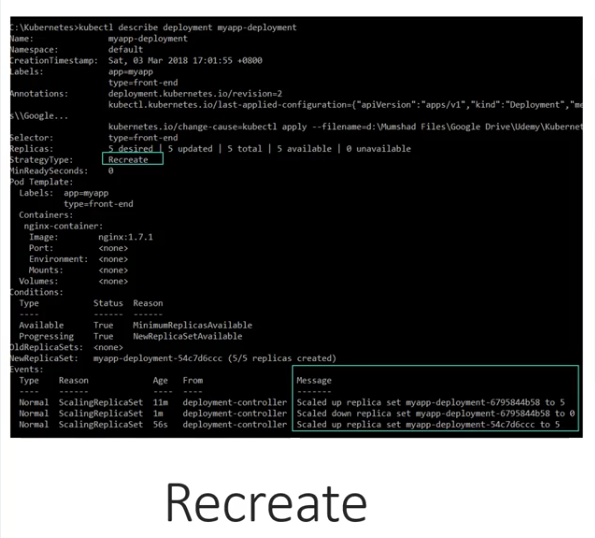

However it the Rolling Update Strategy was used, the old replicaset was scaled down one at a time, adn at the same time scaling up the new replicaset.

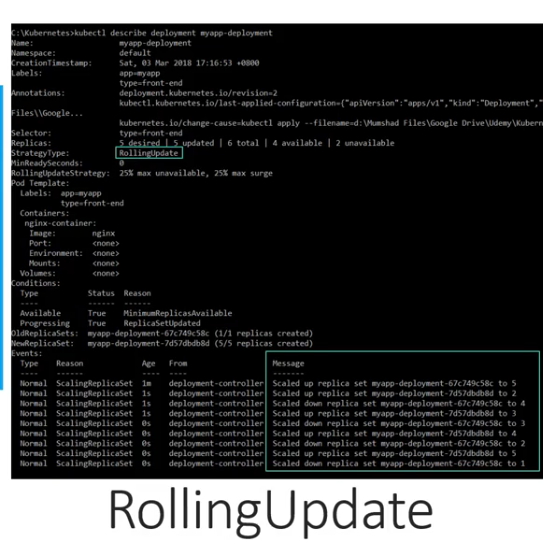



How does a deployment perform an Update under the hood...


Lets say a new deployment is created to deploy 5 replicas., it first creates a replicaset automatically, which turn creates the number of pods, as per the number of replicas.

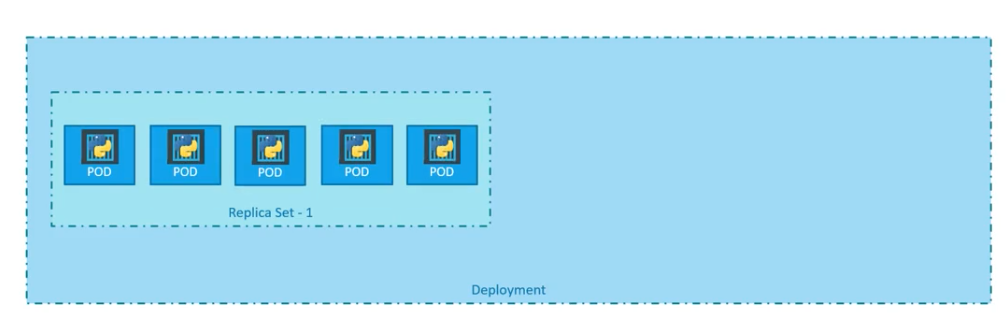

So when you update you app as shown in previous section, a new replicaset is created under the hood, and starts deploying the pods/containers there. The following a Rolling update stragety, taking down the old ones/bringing uo the new pods . You can see this when you list the replicaset.


```
kubectl get replicasets

```

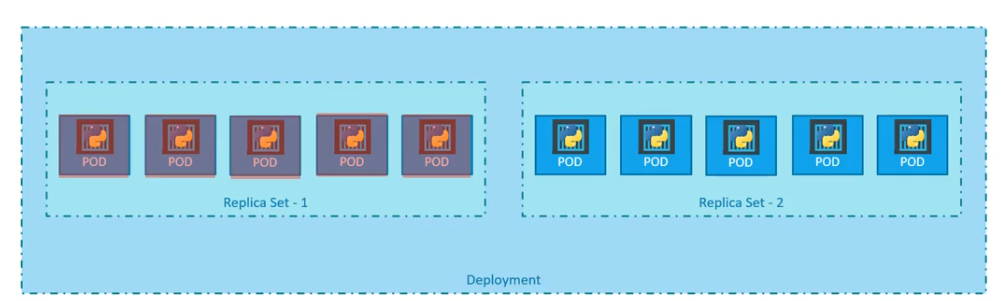

We will see the old replicaset with 0 pods, and new one will 5 pods

But lets say we found a critical bug in the new upgrade, adn we would like to rollback your update. So k8s allows us to rollback to a previous deivision.


We use the following command to undo a change


```
kubectl rollout undo deployment/myapp-deployment

```

So the new replicaset will be destroyed, and old replicaset will be bought up.


Lets revisit our old kubectl run command. We use the run command to create a Pod. 


```
kubectl run nginx --image=nginx

```
In fact, this command created a deployment, and not just a POD. Thats why the output reads ```deployement "nginx"created```


This is another way to create a deployment with an image name, and not using a definition file.

And the replicationset and pods are automatically created under the hood.

However using a defintion yml file is recommended.



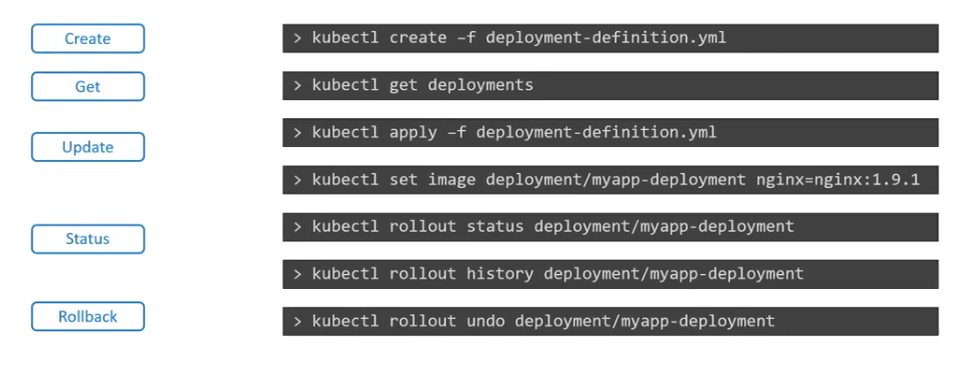



## Deployment Demo

____

Create a new deployment

```
sudo kubectl creat -f deployment-definition.yml
```
result:
```
deployment.apps/myapp-deployment created
```

We can then issue a rollout status. What does this do? A new deployment revision is created now. This is were you start versioning your deployments.

```
sudo kubectl rollout status deployment/myapp-deployment
```
result:
```
deployment "myapp-deployment" successfully rolled out
```

And how do we check this revision:

```
sudo kubectl rollout history deployment/myapp-deployment
```

result:
```
REVISION  CHANGE-CAUSE
1         <none>
```

But there is no ```change cause```, since I did not ask k8s to record the change that we made. This is not important on the first revision, as the first revisionis normally created when we create the deploymen initially.

Lets delete the deployment and start over and do the deployment with a --record parameter

```
sudo kubectl create -f deployment-definition.yml
```

result:

```
sudo kubectl creat -f deployment-definition.yml
```

What does this do? Lets see the status of rollout (by version it)

result
```
deployment "myapp-deployment" successfully rolled out
```

Check the history now


```
sudo kubectl rollout history deployment/myapp-deployment
```
result:
```
REVISION  CHANGE-CAUSE
1         kubectl create --filename=deployment-definition.yml --record=true
```

Here we now see the change cause, whcih was the command we ran when we created the deployment.




Next....


Lets make a small change to the deployment:

If we lok at the nginx version on docker hub, we see the latest is 1.17.10. Sincw we did not specified a tag, so by default it assumes it to be latest. (deployment file)

So how do we simulate an upgrade or downgrade of a deployment, in our case we want to downgrade to lower nginx version.

We want to downgrade to 1.12 (assumme we upgrading the app)

So lets make a change in the deployment-definition.yml file.

```
apiVersion: apps/v1
kind: Deployment
metadata:
  labels:
    app: myapp
    type: front-end
  name: myapp-deployment
spec:
  replicas: 3
  selector:
    matchLabels:
      app: myapp
  template:
    metadata:
      labels:
        app: myapp
      name: myapp-pod
    spec:
      containers:
        - image: nginx:1.12
          name: nginx-container

```

Lest apply that change:

```
sudo kubectl apply -f deployment-deployment.yml
```

result
```
Warning: kubectl apply should be used on resource created by either kubectl create --save-config or kubectl apply
deployment.apps/myapp-deployment configured
```
Then we iss the status command again:


```
sudo kubectl rollout status deployment/myapp-deployment

```

result:

```
Waiting for deployment "myapp-deployment" rollout to finish: 1 out of 3 new replicas have been updated...
Waiting for deployment "myapp-deployment" rollout to finish: 1 out of 3 new replicas have been updated...
Waiting for deployment "myapp-deployment" rollout to finish: 1 out of 3 new replicas have been updated...
Waiting for deployment "myapp-deployment" rollout to finish: 2 out of 3 new replicas have been updated...
Waiting for deployment "myapp-deployment" rollout to finish: 2 out of 3 new replicas have been updated...
Waiting for deployment "myapp-deployment" rollout to finish: 2 out of 3 new replicas have been updated...
Waiting for deployment "myapp-deployment" rollout to finish: 1 old replicas are pending termination...
Waiting for deployment "myapp-deployment" rollout to finish: 1 old replicas are pending termination...
deployment "myapp-deployment" successfully rolled out

```
Then if we want to see the deployment:

```
Name:                   myapp-deployment
Namespace:              default
CreationTimestamp:      Wed, 20 May 2020 05:04:23 -0400
Labels:                 app=myapp
                        type=front-end
Annotations:            deployment.kubernetes.io/revision: 2
                        kubernetes.io/change-cause: kubectl create --filename=deployment-definition.yml --record=true
Selector:               app=myapp
Replicas:               3 desired | 3 updated | 3 total | 3 available | 0 unavailable
StrategyType:           RollingUpdate
MinReadySeconds:        0
RollingUpdateStrategy:  25% max unavailable, 25% max surge
Pod Template:
  Labels:  app=myapp
  Containers:
   nginx-container:
    Image:        nginx:1.12
    Port:         <none>
    Host Port:    <none>
    Environment:  <none>
    Mounts:       <none>
  Volumes:        <none>
Conditions:
  Type           Status  Reason
  ----           ------  ------
  Available      True    MinimumReplicasAvailable
  Progressing    True    NewReplicaSetAvailable
OldReplicaSets:  <none>
NewReplicaSet:   myapp-deployment-cff55c767 (3/3 replicas created)
Events:
  Type    Reason             Age   From                   Message
  ----    ------             ----  ----                   -------
  Normal  ScalingReplicaSet  35m   deployment-controller  Scaled up replica set myapp-deployment-54d795d7f9 to 3
  Normal  ScalingReplicaSet  22m   deployment-controller  Scaled up replica set myapp-deployment-cff55c767 to 1
  Normal  ScalingReplicaSet  19m   deployment-controller  Scaled down replica set myapp-deployment-54d795d7f9 to 2
  Normal  ScalingReplicaSet  19m   deployment-controller  Scaled up replica set myapp-deployment-cff55c767 to 2
  Normal  ScalingReplicaSet  18m   deployment-controller  Scaled down replica set myapp-deployment-54d795d7f9 to 1
  Normal  ScalingReplicaSet  18m   deployment-controller  Scaled up replica set myapp-deployment-cff55c767 to 3
  Normal  ScalingReplicaSet  18m   deployment-controller  Scaled down replica set myapp-deployment-54d795d7f9 to 0

```

Here we can see how the default rollour strategy works...
1. We can see the new image name
2. Froim the events we can the old replicaset is scaled down (numbers are coming down), then the new one is scaled up.


Lets check the new revision:

```
sudo kubectl rollout history deployment/myapp-deployment
```

result
```
REVISION  CHANGE-CAUSE
1         kubectl create --filename=deployment-definition.yml --record=true
2         kubectl apply --filename=deployment-definition.yml --record=true
```

Tells me that there is a new revision, called revision 2 and the command that we used to create a new revision was apply command

Lets make the same change using the set image commmand.

```
kubectl set image /deployment/myapp-deployment nginx-container=nginx:1.12-perl
```
then run status to update the version

```
sudo kubectl rollout status deployment/myapp-deployment

```

results:

```
Waiting for deployment "myapp-deployment" rollout to finish: 1 out of 3 new replicas have been updated...
Waiting for deployment "myapp-deployment" rollout to finish: 1 out of 3 new replicas have been updated...
Waiting for deployment "myapp-deployment" rollout to finish: 1 out of 3 new replicas have been updated...
Waiting for deployment "myapp-deployment" rollout to finish: 2 out of 3 new replicas have been updated...
Waiting for deployment "myapp-deployment" rollout to finish: 2 out of 3 new replicas have been updated...
Waiting for deployment "myapp-deployment" rollout to finish: 2 out of 3 new replicas have been updated...
Waiting for deployment "myapp-deployment" rollout to finish: 1 old replicas are pending termination...
Waiting for deployment "myapp-deployment" rollout to finish: 1 old replicas are pending termination...
deployment "myapp-deployment" successfully rolled out
```

then run statusm we get new revision 3

I dont see the set image update??


```
REVISION  CHANGE-CAUSE
1         kubectl create --filename=deployment-definition.yml --record=true
2         kubectl apply --filename=deployment-definition.yml --record=true
3         kubectl apply --filename=deployment-definition.yml --record=true

```

(this seem to be a bug)

Use describe to see the new nginx version which is set to perl.

Lets say lots favour, and we need to rollback the last change:


```
sudo kubectl rollout undo deployment/myapp-deployment
```
result:

```
deployment.apps/myapp-deployment rolled back
```

But need to do a status again


```
sudo kubectl rollout status deployment/myapp-deployment

```

Now with running history, we get revision 4, with 3 missing.


```
REVISION  CHANGE-CAUSE
1         kubectl create --filename=deployment-definition.yml --record=true
3         kubectl apply --filename=deployment-definition.yml --record=true
4         kubectl apply --filename=deployment-definition.yml --record=true
```

Now revision 2 is missing, that is now gone, but revison 4 is created from the command we used to create revision 2. Now its just called revision 4.

Lets simulate an error, by providing an nginx image that does not exist, updated in the defintion file

```
nginx:55.2
```

Lets apply those changes

```
sudo kubectl apply -f deployment-deployment.yml --record

```
Also add a status.


```
sudo kubectl rollout status deployment/myapp-deployment

```
So now in back it is trying to bring down this new image, which is cannot find...it will be stuck here...

We need to break out of here:

An if we run the following

```
sudo kubectl get deployments
```

```
NAME               READY   UP-TO-DATE   AVAILABLE   AGE
myapp-deployment   3/3     1            3           36m
```

Up to date is only 1, and available is 3. So we out of sync.

This is the status of the pods

```
NAME                                READY   STATUS             RESTARTS   AGE
myapp-deployment-84df8dcf54-zgqzx   0/1     ImagePullBackOff   0          6m47s
myapp-deployment-8565d6cfb5-4sjsq   1/1     Running            0          14m
myapp-deployment-8565d6cfb5-q52zk   1/1     Running            0          14m
myapp-deployment-8565d6cfb5-xlm29   1/1     Running            0          13m

```

Its is trying to create a new pod, and get the image, but is stuck here....how do we solve this issue...?
So when k8s could not pull down the image (non existent), it stopped teminatingthe old replicaset (proactively doing so).

Lets see the history now..new revision history no5 is created (although it did not succeed)

```
REVISION  CHANGE-CAUSE
1         kubectl create --filename=deployment-definition.yml --record=true
3         kubectl apply --filename=deployment-definition.yml --record=true
4         kubectl apply --filename=deployment-definition.yml --record=true
5         kubectl apply --filename=deployment-definition.yml --record=true

```

We know there ia n error with this.. so we need to undo the previous rollout...using undo status, then history

```
REVISION  CHANGE-CAUSE
1         kubectl create --filename=deployment-definition.yml --record=true
3         kubectl apply --filename=deployment-definition.yml --record=true
5         kubectl apply --filename=deployment-definition.yml --record=true
6         kubectl apply --filename=deployment-definition.yml --record=true

```
Now rev 4 is missing, which has been renamed to 6.


And getdeployment and ods are now correct

```
NAME                                READY   STATUS    RESTARTS   AGE
myapp-deployment-8565d6cfb5-4sjsq   1/1     Running   0          21m
myapp-deployment-8565d6cfb5-q52zk   1/1     Running   0          22m
myapp-deployment-8565d6cfb5-xlm29   1/1     Running   0          21m

NAME               READY   UP-TO-DATE   AVAILABLE   AGE
myapp-deployment   3/3     3            3           49m
osboxes@kubemaster:~/ymlfiles/deployments$ 
```

## 

## 

## 